In [1]:
#run this cell if you want to be able to autoreload packages
#(meaning that you don't have to restart the kernal when you make changes to code)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%run -i "prerequisites.py"

In [7]:
import scipy as sp

In [2]:
# powermeter1 = Powermeter('PM100USB', serial='P2003916', unit='dBm', wavelength=1550) 
unit='dBm'
wavelength=1550
#Alice (tele) powermeters 10/03/20:
PMa = PM('PM100USB', serial='P2007347',unit=unit, wavelength = wavelength)
PMb = PM('PM100USB', serial='P2010371',unit=unit, wavelength = wavelength) 
PMc = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength) 
PMd = PM('PM100USB', serial='P2008115',unit=unit, wavelength = wavelength)
#Charlie powermeters 10/03/20:
PMe = PM('PM100USB', serial='P2005653',unit=unit, wavelength = wavelength)
PMf = PM('PM100USB', serial='P2010372',unit=unit, wavelength = wavelength) 
PMg = PM('PM100USB', serial='P2008116',unit=unit, wavelength = wavelength) 
PMh = PM('PM100USB', serial='P2007346',unit=unit, wavelength = wavelength)

PMi = PM('PM100USB', serial='P2008979',unit=unit, wavelength = wavelength)
PMj = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength)

PM_idler = {"PMa":PMa,"PMb":PMb, "PMc":PMc,"PMd":PMd}
PM_signal = {"PMe":PMe,"PMf":PMf, "PMg":PMg,"PMh":PMh}
PM_all = {"PMa":PMa,"PMb":PMb, "PMc":PMc,"PMd":PMd, "PMe":PMe,"PMf":PMf, "PMg":PMg,"PMh":PMh}

In [3]:
# Wavelengths
p_wavelength = 1549.3
i_wavelength = 1558.98
s_wavelength = 1539.77

unit='dBm'
serial_port_name = 'COM13'
mytunics = tunics(serial_port_name = serial_port_name, unit=unit)


Connected to Tunics laser on serial port COM13



In [12]:
# Laser Settings
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on') 
mytunics.laser_power(0) 

In [126]:
mytunics.laser_switch('off') 

In [ ]:
Alice0 = PMa.measure()
Alice1 = PMb.measure()
Alice2 = PMc.measure()
Alice3 = PMd.measure()

In [123]:
#set chip config
#minimise power difference function of relevant phase shifter

def BalancePairs(phase, name):
    h.set_many_phases({name:phase})
    balancing_MZIs = {"BS1": (round((PMa.measure()+PMb.measure()-(PMc.measure()+PMd.measure()))/(PMa.measure()+PMb.measure()+(PMc.measure()+PMd.measure())),3)),#balance top pair and bottom pair
                     "Prj_RY2": (round((PMa.measure()-PMb.measure())/(PMa.measure()+PMb.measure()),3)), #balance top pair arms
                     "Prj_RY3": (round((PMc.measure()-PMd.measure())/(PMc.measure()+PMd.measure()),3))} #balance bottom pair arms
    return balancing_MZIs[name]

In [115]:
h.set_many_phases({"BS1":pi/2+0.3, #0.3
    "BS2":pi/2+0.8, #-0.23
    "BS3":pi/2+0.75, #0.75
    "WDM1":pi,
    "WDM2":pi,
    "WDM3":pi,
    "WDM4":pi,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":pi,
    "Prj_RY1":pi/2,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":0})

BS1_balance = sp.optimize.minimize(BalancePairs, pi/2, args = ("BS1"), bounds = [(-np.pi,np.pi)], method='SLSQP', options = {'eps':0.1})
h.set_many_phases({"BS1":BS1_balance.x[0]})
print("done")
Prj_RY2_balance = sp.optimize.minimize(BalancePairs, pi/2, args = ("Prj_RY2"), bounds = [(-np.pi,np.pi)], method='SLSQP', options = {'eps':0.1})
h.set_many_phases({"Prj_RY2":Prj_RY2_balance.x[0]})
print("done")
Prj_RY3_balance = sp.optimize.minimize(BalancePairs, pi/2, args = ("Prj_RY3"), bounds = [(-np.pi,np.pi)], method='SLSQP', options = {'eps':0.1})
h.set_many_phases({"Prj_RY3":Prj_RY3_balance.x[0]})

0.122
1.5707963267948966
0.132
1.6707963267948966
0.131
1.4707963267948965
0.114
1.5444805373212123
0.126
1.6444805373212124
0.025
0.9444805373212137
0.033
1.0444805373212138
-0.026
-0.25551946267878445
-0.264
-0.3555194626787844
0.033
-3.141592653589793
0.125
-1.68626665989593
-0.05
-0.9405173592317113
-0.152
-0.6031357616227051
-0.195
-0.7031357616227051
-0.189
-0.6797896121590569
-0.18
-0.7797896121590568
-0.195
-0.6665225995662267
-0.172
-0.7665225995662267
-0.2
-0.4969996608800644
-0.236
-0.5969996608800644
-0.216
-0.6004373861800956
-0.199
-0.7004373861800955
-0.214
-0.567259247876312
-0.222
-0.5881908441416575
-0.199
-0.6881908441416574
-0.092
-0.36375049679253324
-0.046
-0.5562950828184716
-0.209
-0.5850012680093388
-0.219
-0.5878718865284256
-0.219
-0.5881589483803342
-0.219
-0.5881876545655251
-0.218
-0.5881905251840442
-0.218
-0.5881908122458961
-0.218
-0.5881908409520813
-0.217
-0.5881908438226998
-0.217
-0.5881908441097617
done
-0.065
1.5707963267948966
-0.049
1.6707963267

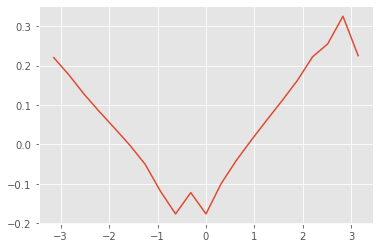

In [124]:
h.set_many_phases({"BS1":pi/2+0.3, #0.3
    "BS2":pi/2+0.8, #-0.23
    "BS3":pi/2+0.75, #0.75
    "WDM1":pi,
    "WDM2":pi,
    "WDM3":pi,
    "WDM4":pi,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":pi,
    "Prj_RY1":pi/2,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":0})
phases = np.linspace(-pi, pi, 21)
power = []
name="BS1"
for i in phases:
    h.set_many_phases({"BS1":i})
    power.append(BalancePairs(i, name))
    
index = power.index(min(power))
balanced_phase = phases[index]
plt.plot(phases, power)

In [107]:
print(BS1_balance.x[0])
print(Prj_RY2_balance.x[0])
print(Prj_RY3_balance.x[0])

1.518839804968232
-0.03978416125215213
1.5707963245323329


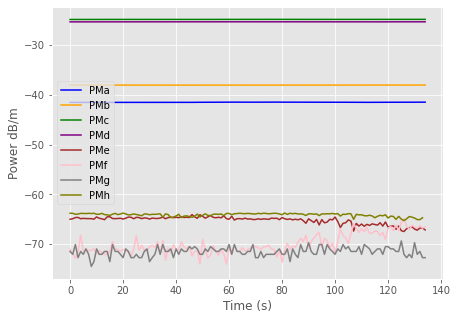

In [125]:
LP.live_opt_pow(heaters = PM_all)